In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

(-0.5, 299.5, 299.5, -0.5)

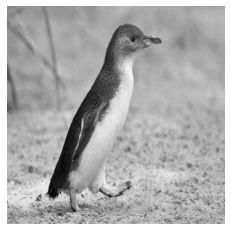

In [8]:
image = Image.open('penguin.jpg').convert('RGB').convert('L').resize((300,300))
image = np.array(image).astype('float32')/255
image_before = image[:]/255
plt.imshow(image,cmap='binary_r')
plt.axis('off')

In [9]:
allowed_colors = np.linspace(0,1,2)

In [10]:
from tqdm import tqdm

In [11]:
for y in tqdm(range(image.shape[1]-1)):
  for x in range(image.shape[0]-1):
    oldpixel = image[x][y]
    #newpixel = np.array([min(allowed_colors, key=lambda x:abs(x-item)) for item in image[x][y]]) #for colored images, but I'm not sure if this is exactly what they want because this quantizes each channel individually.
    newpixel = np.array(min(allowed_colors, key=lambda k:abs(k-image[x][y]))) #For grayscale images
    quant_error = oldpixel - newpixel
    image[x][y] = newpixel
    image[x+1][y] = image[x+ 1][y] + quant_error*(7/16)
    image[x-1][y+1] = image[x-1][y+1] + quant_error*(3/16)
    image[x][y+1] = image[x][y+1] + quant_error*(5/16)
    image[x+1][y+1] = image[x+1][y+1] + quant_error*(1/16)

100%|██████████| 299/299 [00:01<00:00, 150.53it/s]


Before dither:


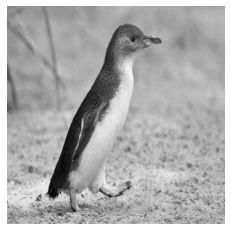

After dither:


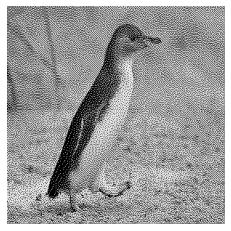

In [12]:
print('Before dither:')
plt.imshow(image_before,cmap='binary_r')
plt.axis('off')
plt.show()
print('After dither:')
plt.imshow(image,cmap='binary_r')
plt.axis('off')
plt.show()

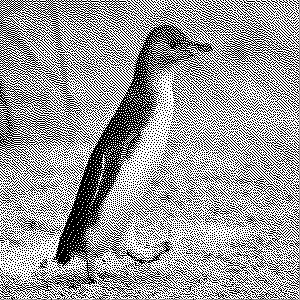

In [13]:
Image.fromarray((255*image).astype('uint8'))